In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.signal import butter, filtfilt

In [2]:
# Design Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalize cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply filter
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)  # Zero-phase filtering
    return y

In [3]:
def block_average(signal, down_factor):
    # Taglia la lunghezza per essere divisibile per down_factor
    trimmed_length = len(signal) - (len(signal) % down_factor)
    trimmed_signal = signal[:trimmed_length]
    # Reshape e media
    return trimmed_signal.reshape(-1, down_factor).mean(axis=1)

In [4]:
datapath = 'data/'
generated = np.load(f'{datapath}/generated/LFP_signal.npy')
original = np.load(f'{datapath}/original/LFP_signal.npy')

In [5]:
with open("simulation_params.json", "r") as f:
    params = json.load(f)
t_tot = int(params.get("simulation", {}).get("t_tot", None))    # ms
dt = params.get("simulation", {}).get("dt", 0.1)    # ms

In [6]:
print("total time:", t_tot/1e3, "s")
print("python sim dt:", t_tot/original.size, "ms")
print("C sim dt:", t_tot/generated.size, "ms")
down_factor_C = int(generated.size / original.size)
print("down factor C:", down_factor_C)

total time: 1000.0 s
python sim dt: 2.0 ms
C sim dt: 0.1 ms
down factor C: 20


In [7]:
generated_f = lowpass_filter(generated, 300, 10000, order=1)

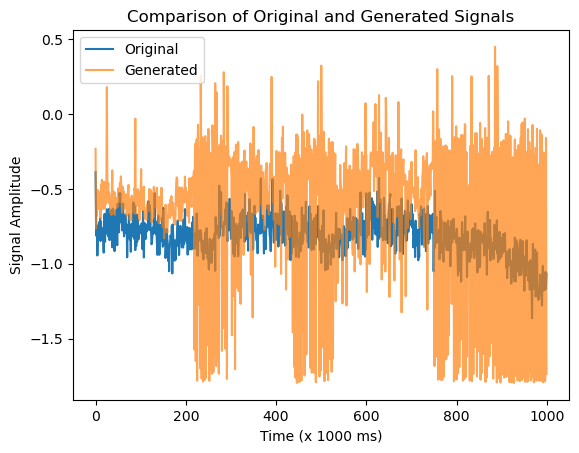

In [8]:
down = 500
plt.plot(original[::down], label='Original')
plt.plot(block_average(generated_f, down_factor=down_factor_C)[::down], label='Generated', alpha=0.7)
plt.title('Comparison of Original and Generated Signals')
plt.xlabel(f'Time (x {t_tot/original.size*down:.0f} ms)')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.show()

## Python states

In [17]:
x1_p = np.load(f'{datapath}/original/pop1_states.npy')
x2_p = np.load(f'{datapath}/original/pop2_states.npy')

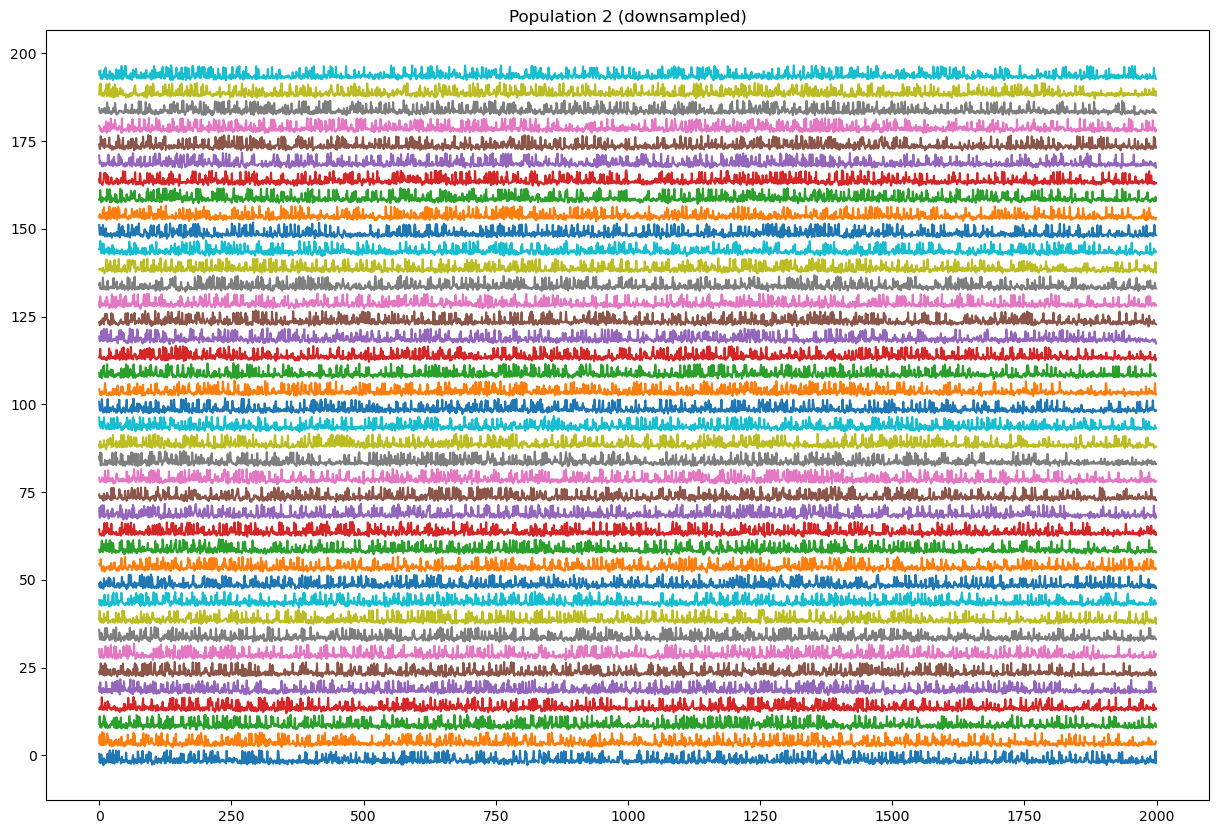

In [23]:
pop = 2
x = x1_p if pop == 1 else x2_p
plt.figure(figsize=(15, 10))
plt.title(f'Population {pop} (downsampled)')
for i in range(x.shape[0]):
    plt.plot(x[i, ::250]+i*5)

## C states

In [19]:
x1_c = np.load(f'{datapath}/generated/pop1_states.npy')
x2_c = np.load(f'{datapath}/generated/pop2_states.npy')

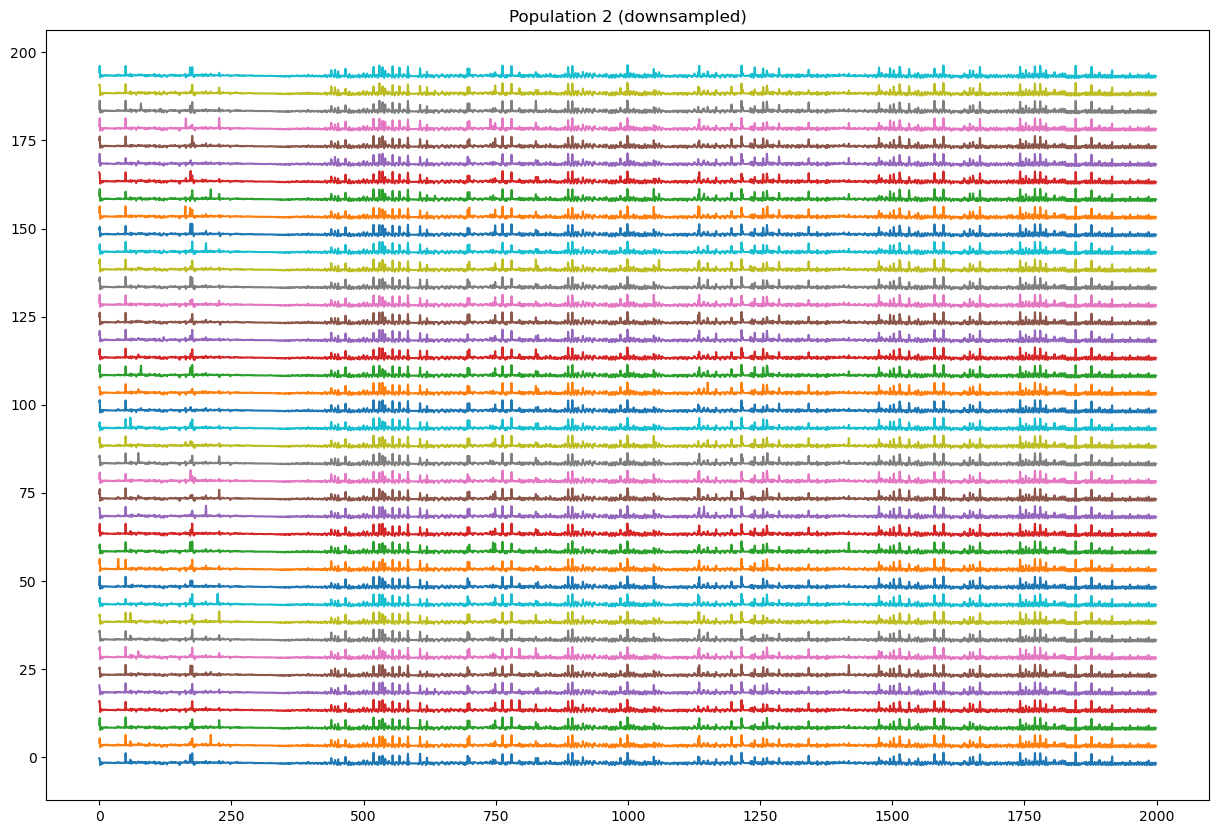

In [24]:
pop = 2
x = x1_c if pop == 1 else x2_c
plt.figure(figsize=(15, 10))
plt.title(f'Population {pop} (downsampled)')
for i in range(x.shape[1]):
    plt.plot(x[:, i]+i*5)

## Comparison

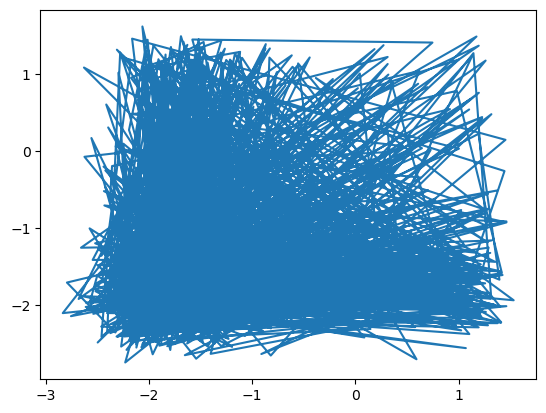

In [47]:
plt.plot(x2_p[0,::250], x2_p[1,::250])
plt.show()

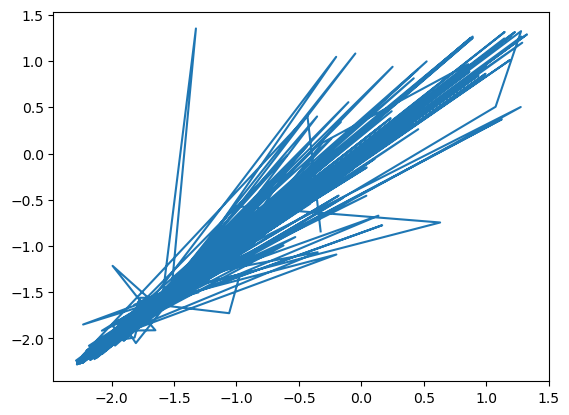

In [48]:
plt.plot(x2_c[:,0], x2_c[:,1])
plt.show()